In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
df = pd.read_excel("Data/Group6_Data.xlsx")
time, mean = df.to_numpy().T
df.head()

,time,Mean8
0,1,36.0700
1,2,35.7969
2,3,35.5043
3,4,36.2205
4,5,35.9146


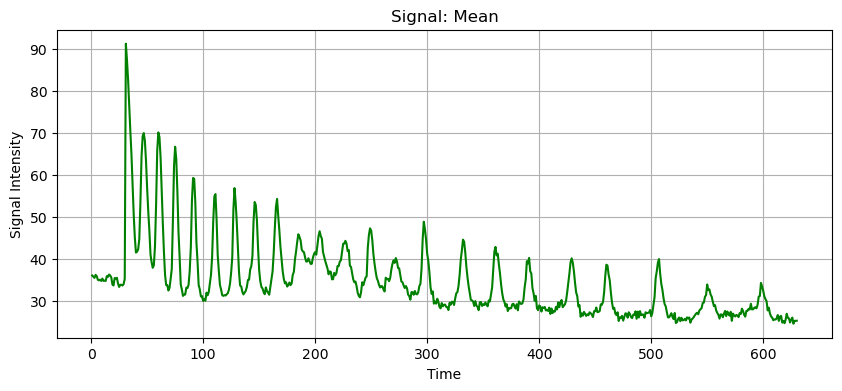

In [3]:
plt.figure(figsize=(10,4))
plt.plot(time, mean, 'g')
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("Signal: Mean")
plt.grid()
plt.show()

# **Data Preprocessing**

## **Baseline Correction**

In [4]:
degree = 2
poly_coeffs = np.polyfit(time, mean, degree)
baseline = np.polyval(poly_coeffs, time)

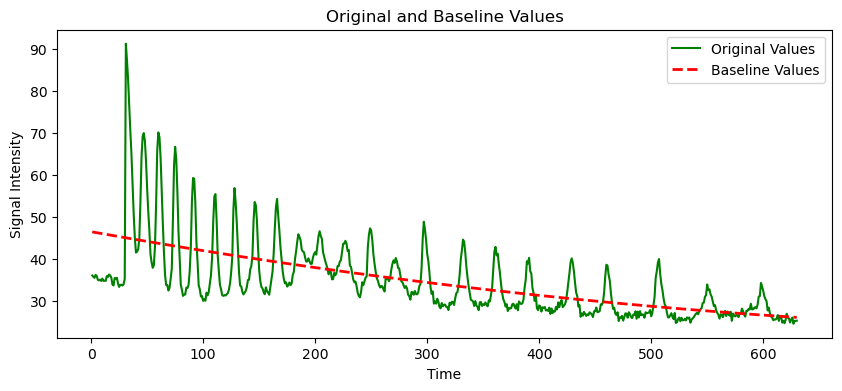

In [5]:
plt.figure(figsize=(10,4))
plt.plot(time, mean, 'g', label="Original Values")
plt.plot(time, baseline, '--r', label="Baseline Values", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("Original and Baseline Values")
plt.legend()
plt.show()

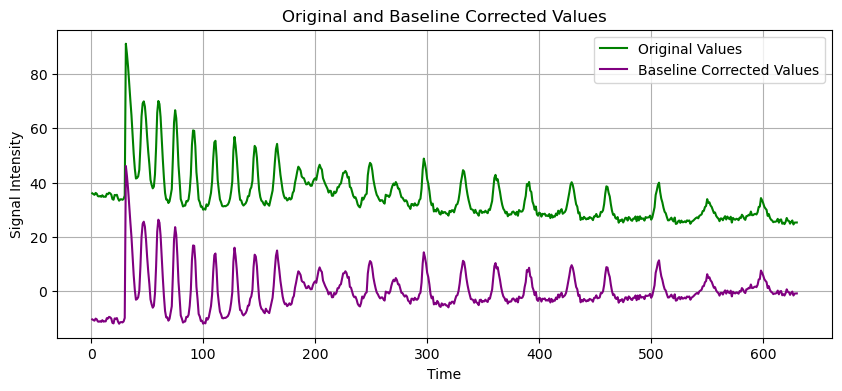

In [6]:
baseline_corrected_values = mean - baseline

plt.figure(figsize=(10,4))
plt.plot(time, mean, 'g', label="Original Values")
plt.plot(time, baseline_corrected_values, c="purple", label="Baseline Corrected Values")
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("Original and Baseline Corrected Values")
plt.grid()
plt.legend()
plt.show()

## **Normalizing Data**

**Here we use min-max scaling to normalize the data**

In [7]:
min_value = np.min(baseline_corrected_values)
max_value = np.max(baseline_corrected_values)

normalized_data = (baseline_corrected_values - min_value) / (max_value - min_value)

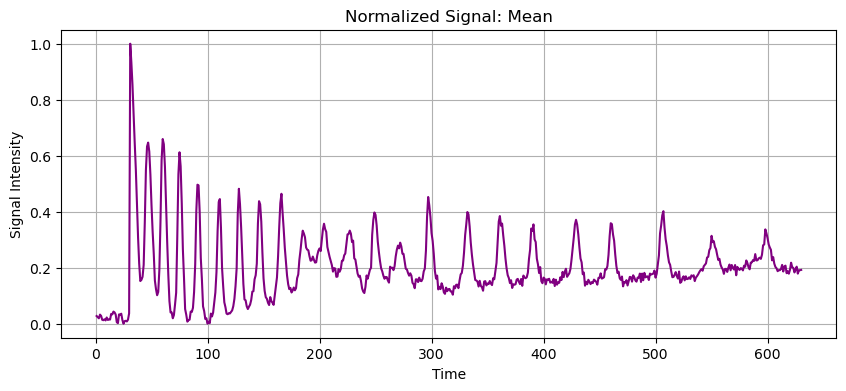

In [8]:
plt.figure(figsize=(10,4))
plt.plot(time, normalized_data, c="purple")
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("Normalized Signal: Mean")
plt.grid()
plt.show()

# **Euler's Method**

In [9]:
# Parameters
IP3 = 0.5
v1 = 6
v2 = 0.11
v3 = 0.9
c0 = 2
c1 = 0.185
a2 = 0.2
d1 = 0.13
d2 = 1.049
d3 = 0.9434
d5 = 0.08234
k3 = 0.1

# Time points
time_points = np.arange(0, 100, 0.1) 
dt = np.diff(time_points, prepend=0.1)  

# Initial conditions
Ca = np.zeros(len(time_points))
h = np.zeros(len(time_points))
Ca[0] = 0.1
h[0] = 0.1

In [10]:
# Simulation loop
for t in range(1, len(time_points)):
    
    CaER = (c0 - Ca[t-1]) / c1

    # Steady-state functions
    pinf = IP3 / (IP3 + d1)
    ninf = Ca[t-1] / (Ca[t-1] + d5)
    Q2 = d2 * (IP3 + d1) / (IP3 + d3)

    # h-related functions
    tauh = 1 / (a2 * (Q2 + Ca[t-1]))
    hinf = Q2 / (Q2 + Ca[t-1])
    alphah = hinf / tauh
    betah = (1 - hinf) / tauh

    # Rate of change for h (equation 2)
    dh = alphah * (1 - h[t-1]) - betah * h[t-1]

    # Rate of change for Ca (equation 1) with corrected powers and multiplications
    dCa = (c1 * v1 * pinf**3 * ninf**3 * h[t-1]**3 * (CaER - Ca[t-1])
           + c1 * v2 * (CaER - Ca[t-1])
           - v3 * (Ca[t-1]**2 / (Ca[t-1]**2 + k3**2)))

    # Update Ca and h values using the time step (dt)
    Ca[t] = Ca[t-1] + dCa * dt[t-1]
    h[t] = h[t-1] + dh * dt[t-1]

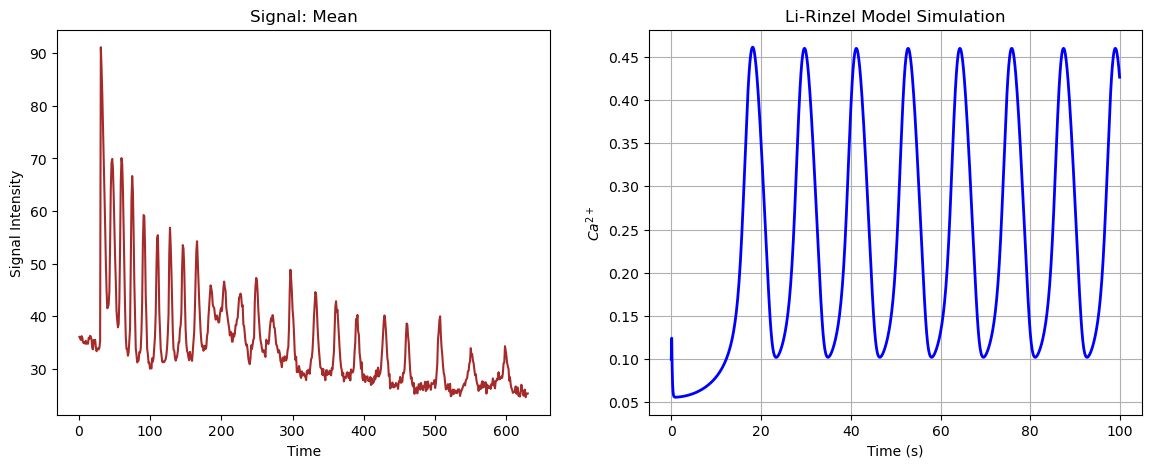

In [11]:
# Plot
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.plot(time, mean, c="brown")
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("Signal: Mean")

plt.subplot(1,2,2)
plt.plot(time_points, Ca,'-b', linewidth=2 )
plt.xlabel('Time (s)')
plt.ylabel('$Ca^{2+}$')
plt.title('Li-Rinzel Model Simulation')
plt.grid()
plt.show()

# **Monte Carlo simulation**

In [12]:
np.random.seed(10)
size1 = 30
X_norm = np.random.uniform(5.75, 6.25, size1)
Y_norm = np.random.uniform(0.075, 0.125, size1)
Z_norm = np.random.uniform(0.875, 0.925, size1)

v1_v2_v3 = [(X_norm[i], Y_norm[j], Z_norm[k]) for i in range(len(X_norm)) for j in range(len(Y_norm)) for k in range(len(Z_norm))]

ca_matrix = []
plot_counter = 0

In [13]:
for i in range(len(X_norm)):
    for j in range(len(Y_norm)):
        for k in range(len(Z_norm)):
            # Constants
            v1 = X_norm[i]
            v2 = Y_norm[j]
            v3 = Z_norm[k]
            IP3 = 0.5
            c0 = 2
            c1 = 0.185
            a2 = 0.2
            d1 = 0.13
            d2 = 1.049
            d3 = 0.9434
            d5 = 0.08234
            k3 = 0.1

            time_1 = np.arange(0, 575.1, 0.1)
            dt = 0.1

            
            Ca = [0.1]
            h = [0.1]

        
            for t in range(1, len(time_1)):
                CaER = (c0 - Ca[t-1]) / c1
                pinf = IP3 / (IP3 + d1)
                ninf = Ca[t-1] / (Ca[t-1] + d5)
                Q2 = d2 * (IP3 + d1) / (IP3 + d3)
                tauh = 1 / (a2 * (Q2 + Ca[t-1]))
                hinf = Q2 / (Q2 + Ca[t-1])
                alphah = hinf / tauh
                betah = (1 - hinf) / tauh

                dh = alphah * (1 - h[t-1]) - betah * h[t-1]
                dCa = c1 * v1 * pinf**3 * ninf**3 * h[t-1]**3 * (CaER - Ca[t-1]) + c1 * v2 * (CaER - Ca[t-1]) - v3 * Ca[t-1]**2 / (Ca[t-1]**2 + k3**2)
                
                Ca.append(Ca[t-1] + dCa * dt)
                h.append(h[t-1] + dh * dt)

            ca_matrix.append(Ca)
            
            # Increment the plot counter
            plot_counter += 1

print(f"Total number of Ca2+ vs time plots generated: {plot_counter}")

Total number of Ca2+ vs time plots generated: 27000


### **Plots of some simulated data using various v1, v2 and v3**

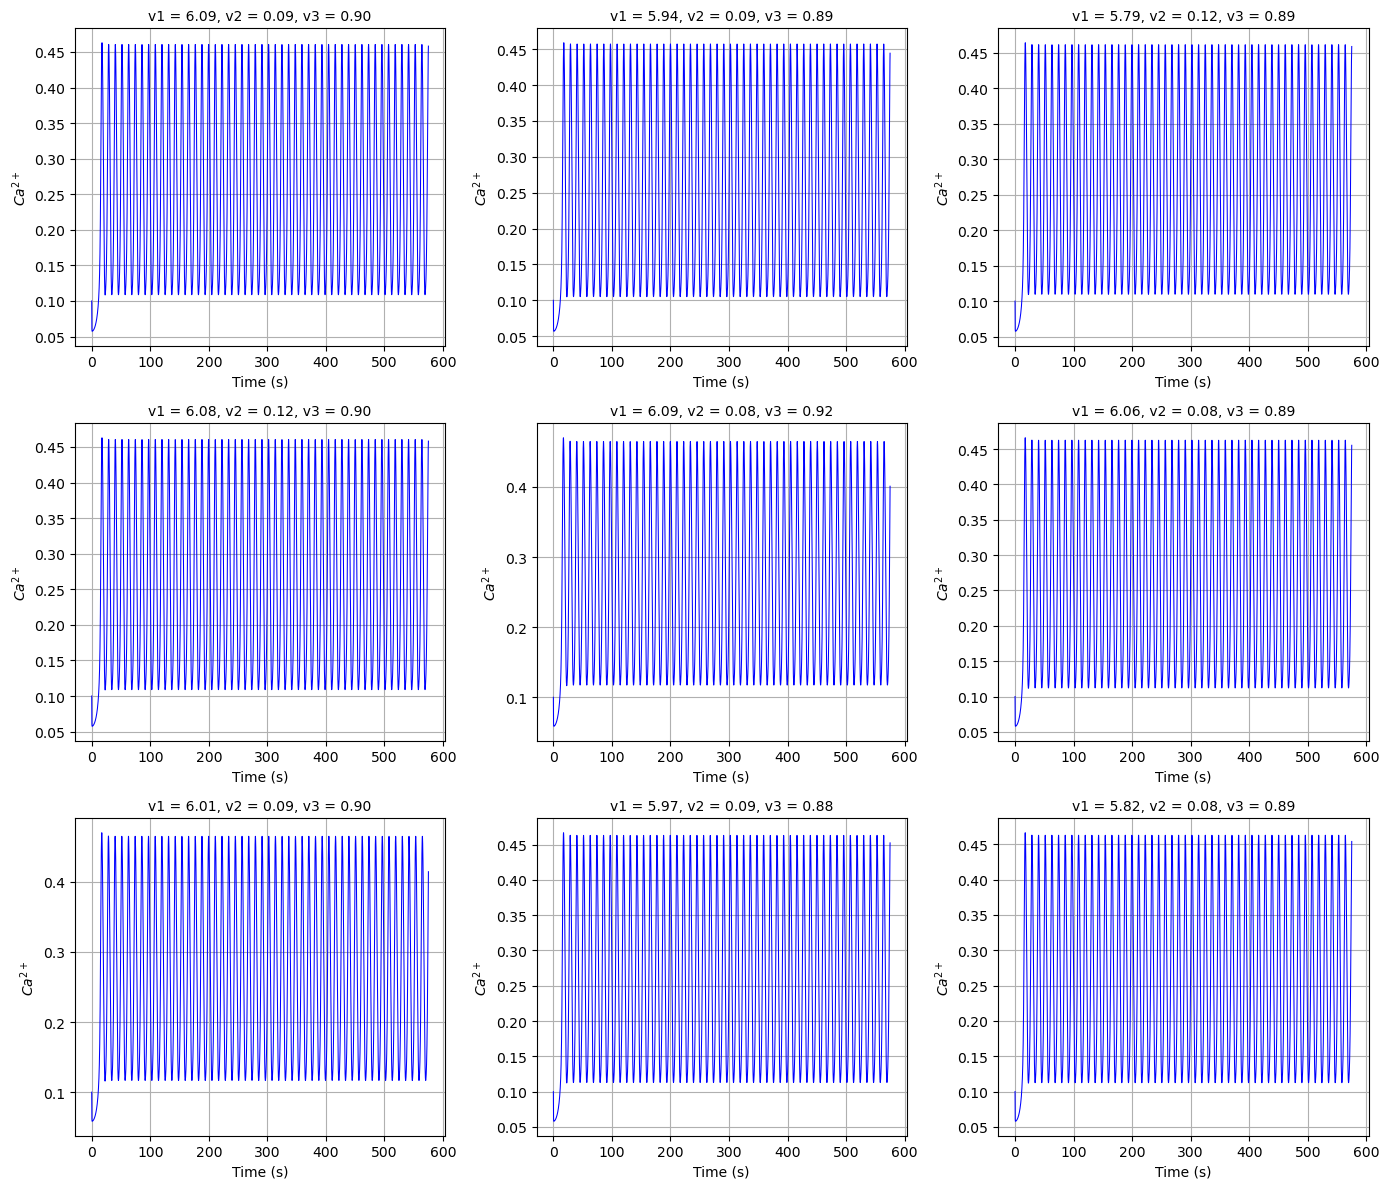

In [14]:
np.random.seed(0)
Ca_matrix = np.array(ca_matrix)
index = np.random.choice(np.arange(0, size1**3), size=9, replace=False)

plt.figure(figsize=(14,12))
for i in range(len(index)):
    plt.subplot(3,3,i+1)
    plt.plot(time_1, Ca_matrix[i], 'b', linewidth=0.75)
    plt.xlabel("Time (s)")
    plt.ylabel("$Ca^{2+}$")
    plt.title(f'v1 = {v1_v2_v3[index[i]][0]:.2f}, v2 = {v1_v2_v3[index[i]][1]:.2f}, v3 = {v1_v2_v3[index[i]][2]:.2f}', fontsize=10)
    plt.grid()

plt.tight_layout()
plt.show()

### **Experimental vs Simulated**

#### **Example**

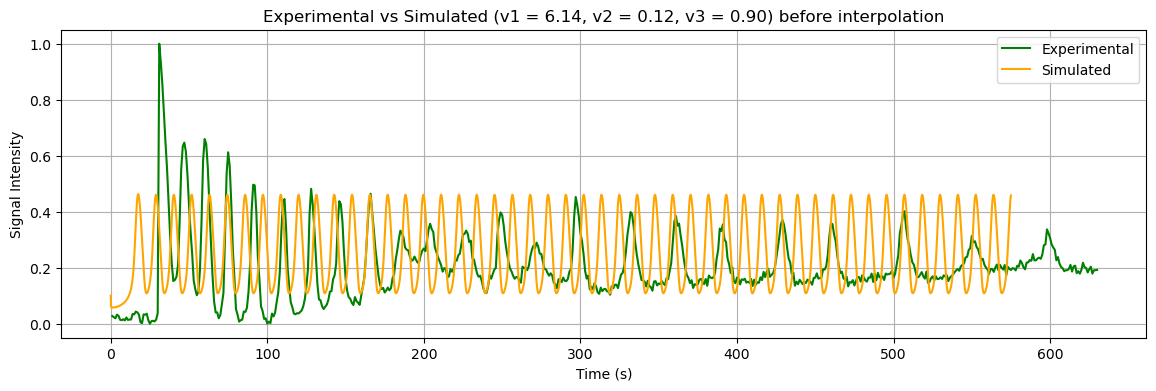

In [15]:
plt.figure(figsize=(14,4))
plt.plot(time, normalized_data, 'g', alpha=1, linewidth=1.5, label="Experimental")
plt.plot(time_1, Ca_matrix[0], c="orange", alpha=1, linewidth=1.5, label="Simulated")
plt.xlabel("Time (s)")
plt.ylabel("Signal Intensity")
plt.title(f"Experimental vs Simulated (v1 = {v1_v2_v3[0][0]:.2f}, v2 = {v1_v2_v3[0][1]:.2f}, v3 = {v1_v2_v3[0][2]:.2f}) before interpolation")
plt.grid()
plt.legend()
plt.show()

## **Interpolation of Simulated data**

In [16]:
dim = size1 * size1 * size1
Ca_interpolated = np.zeros((len(time), dim))
timef = time
for k in range(dim):
    Ca_interp_func = interp1d(time_1, Ca_matrix[k], kind="linear", fill_value="extrapolate")
    Ca_interpolated[:, k] = Ca_interp_func(timef)
Ca_final = Ca_interpolated.T

In [ ]:
sim_data_df = pd.DataFrame(Ca_final)
sim_data_df.to_excel("Data/Group6_Simulated_data", index=False)

#### **Example**

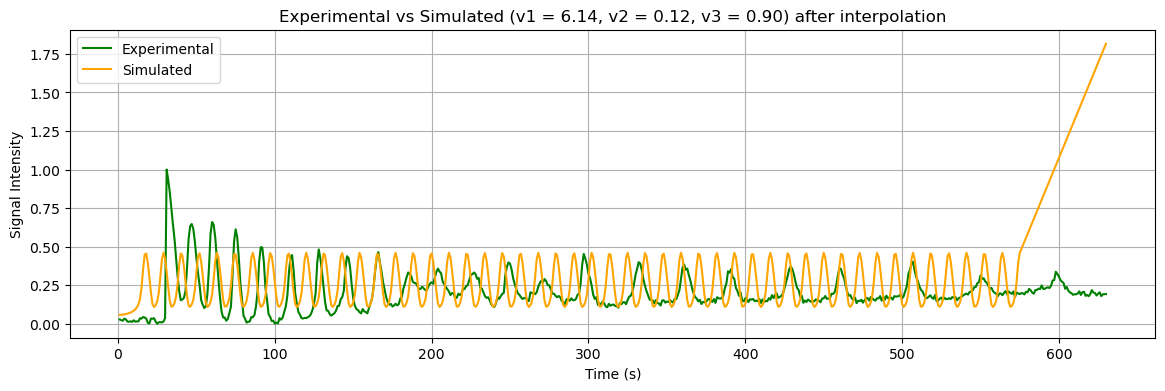

In [17]:
plt.figure(figsize=(14,4))
plt.plot(time, normalized_data, 'g', alpha=1, linewidth=1.5, label="Experimental")
plt.plot(time, Ca_final[0], c="orange", alpha=1, linewidth=1.5, label="Simulated")
plt.xlabel("Time (s)")
plt.ylabel("Signal Intensity")
plt.title(f"Experimental vs Simulated (v1 = {v1_v2_v3[0][0]:.2f}, v2 = {v1_v2_v3[0][1]:.2f}, v3 = {v1_v2_v3[0][2]:.2f}) after interpolation")
plt.grid()
plt.legend()
plt.show()

# **Principal Component Analysis (PCA)**

In [18]:
def cov_xy(x, y):
    n = len(x)
    cov = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (n - 1)
    return cov

def covariance_matrix(n, data):

    cov_mat = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            cov_mat[i, j] = cov_xy(data[i], data[j])
    
    return cov_mat

def eigen_in_descending(matrix):

    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    descending_order = np.argsort(eigenvalues)[::-1] 
    sorted_eigenvalues = eigenvalues[descending_order]
    sorted_eigenvectors = eigenvectors[:,descending_order]
    
    return sorted_eigenvalues, sorted_eigenvectors

def pca(number_of_dimension, number_of_pc, data):

    n = number_of_dimension
    for i in range(n):
        data.T[i] = data.T[i] - np.mean(data.T[i])
    
    cov_matrix = covariance_matrix(n, data.T)
    eigenvalues, eigenvectors = eigen_in_descending(cov_matrix)

    k = number_of_pc
    reduced_data = np.matmul(data, eigenvectors[:,:k])

    return reduced_data

In [19]:
Ca_final_pca = pca(len(time), 3, np.vstack([Ca_final, normalized_data]))
pc1 = Ca_final_pca.T[0]
pc2 = Ca_final_pca.T[1]
pc3 = Ca_final_pca.T[2]

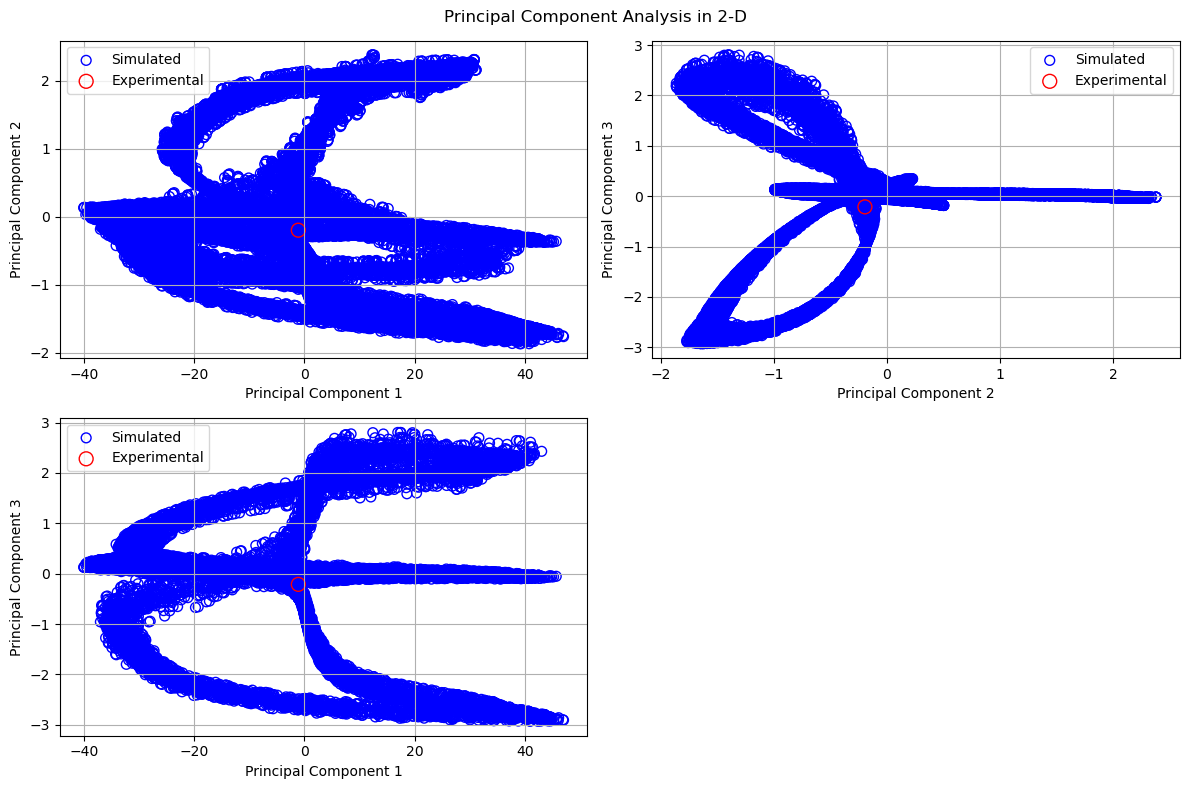

In [20]:
plt.figure(figsize=(12,8))
plt.suptitle("Principal Component Analysis in 2-D")


plt.subplot(2,2,1)
plt.scatter(pc1[:-1].real, pc2[:-1].real,  c='none', marker='o', ec='blue', s=50, label="Simulated")
plt.scatter(pc1[-1].real, pc2[-1].real,  c='none', marker='o', ec='red', s=100, label="Experimental")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(pc2[:-1].real, pc3[:-1].real,  c='none', marker='o', ec='blue', s=50, label="Simulated")
plt.scatter(pc2[-1].real, pc3[-1].real,  c='none', marker='o', ec='red', s=100, label="Experimental")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(pc1[:-1].real, pc3[:-1].real,  c='none', marker='o', ec='blue', s=50, label="Simulated")
plt.scatter(pc1[-1].real, pc3[-1].real,  c='none', marker='o', ec='red', s=100, label="Experimental")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

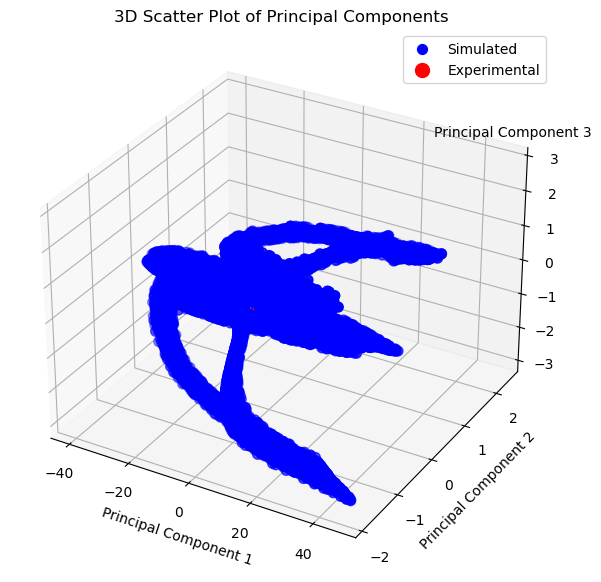

In [84]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1[:-1].real, pc2[:-1].real, pc3[:-1].real, color='blue', marker='o', s=50, depthshade=True, label="Simulated")
ax.scatter(pc1[-1].real, pc2[-1].real, pc3[-1].real, color='red', marker='o', s=100, depthshade=True, label="Experimental")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
fig.text(0.73, 0.66, 'Principal Component 3')
ax.set_title('3D Scatter Plot of Principal Components')
ax.legend()
plt.show()

# **RMSE Comparison**

In [22]:
def rmse(exp_data, sim_data):
    n = len(exp_data)
    RMSE = np.sqrt(np.sum((exp_data - sim_data) ** 2) / n)
    return RMSE

In [23]:
rmse_values = []

for i in range(len(Ca_final)):
    rmse_value = rmse(normalized_data, Ca_final[i])
    rmse_values.append(rmse_value)

rmse_values = np.array(rmse_values)

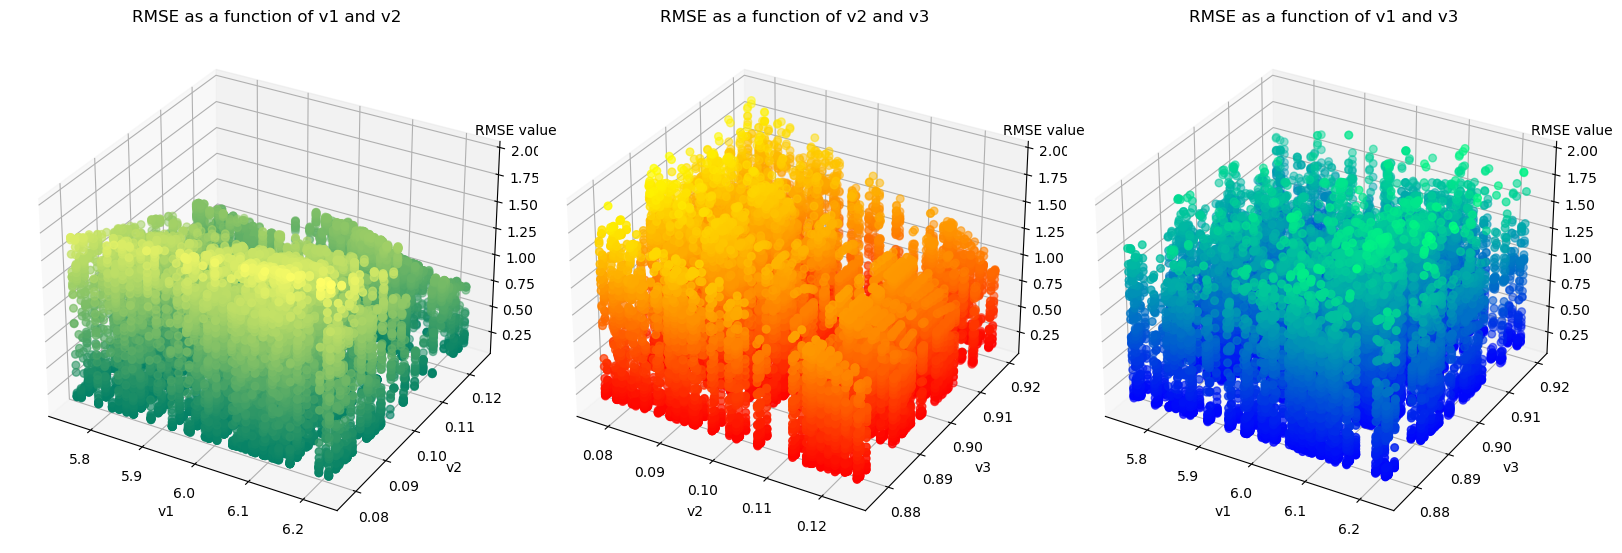

In [85]:
v = np.array(v1_v2_v3)
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(v[:,0], v[:,1], rmse_values, c=rmse_values, cmap='summer', marker='o', s=30)
ax.set_xlabel('v1')
ax.set_ylabel('v2')
ax.set_title('RMSE as a function of v1 and v2')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(v[:,1], v[:,2], rmse_values, c=rmse_values,  cmap='autumn', marker='o', s=30)
ax.set_xlabel('v2')
ax.set_ylabel('v3')
ax.set_title('RMSE as a function of v2 and v3')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(v[:,0], v[:,2], rmse_values, c=rmse_values,  cmap='winter', marker='o', s=30)
ax.set_xlabel('v1')
ax.set_ylabel('v3')
ax.set_title('RMSE as a function of v1 and v3')


fig.text(0.30, 0.69, "RMSE value")
fig.text(0.63, 0.69, "RMSE value")
fig.text(0.96, 0.69, "RMSE value")
plt.tight_layout()
plt.show()

## **Top 5 Best Fit from RMSE values**

In [26]:
min_ind = np.argmin(rmse_values)
max_ind = np.argmax(rmse_values)

sorted_indices = np.argsort(rmse_values)
top_5_smallest_indices = sorted_indices[:5]

rmse_df = pd.DataFrame({"v1": v[top_5_smallest_indices].T[0],
                        "v2": v[top_5_smallest_indices].T[1],
                        "v3": v[top_5_smallest_indices].T[2],
                        "RMSE": rmse_values[top_5_smallest_indices]})

rmse_df

,v1,v2,v3,RMSE
0,5.794170,0.124381,0.920142,0.166861
1,5.794170,0.124381,0.918996,0.167266
2,5.794170,0.124381,0.918905,0.167301
3,5.760376,0.117843,0.904510,0.167369
4,5.760376,0.117843,0.904869,0.167553


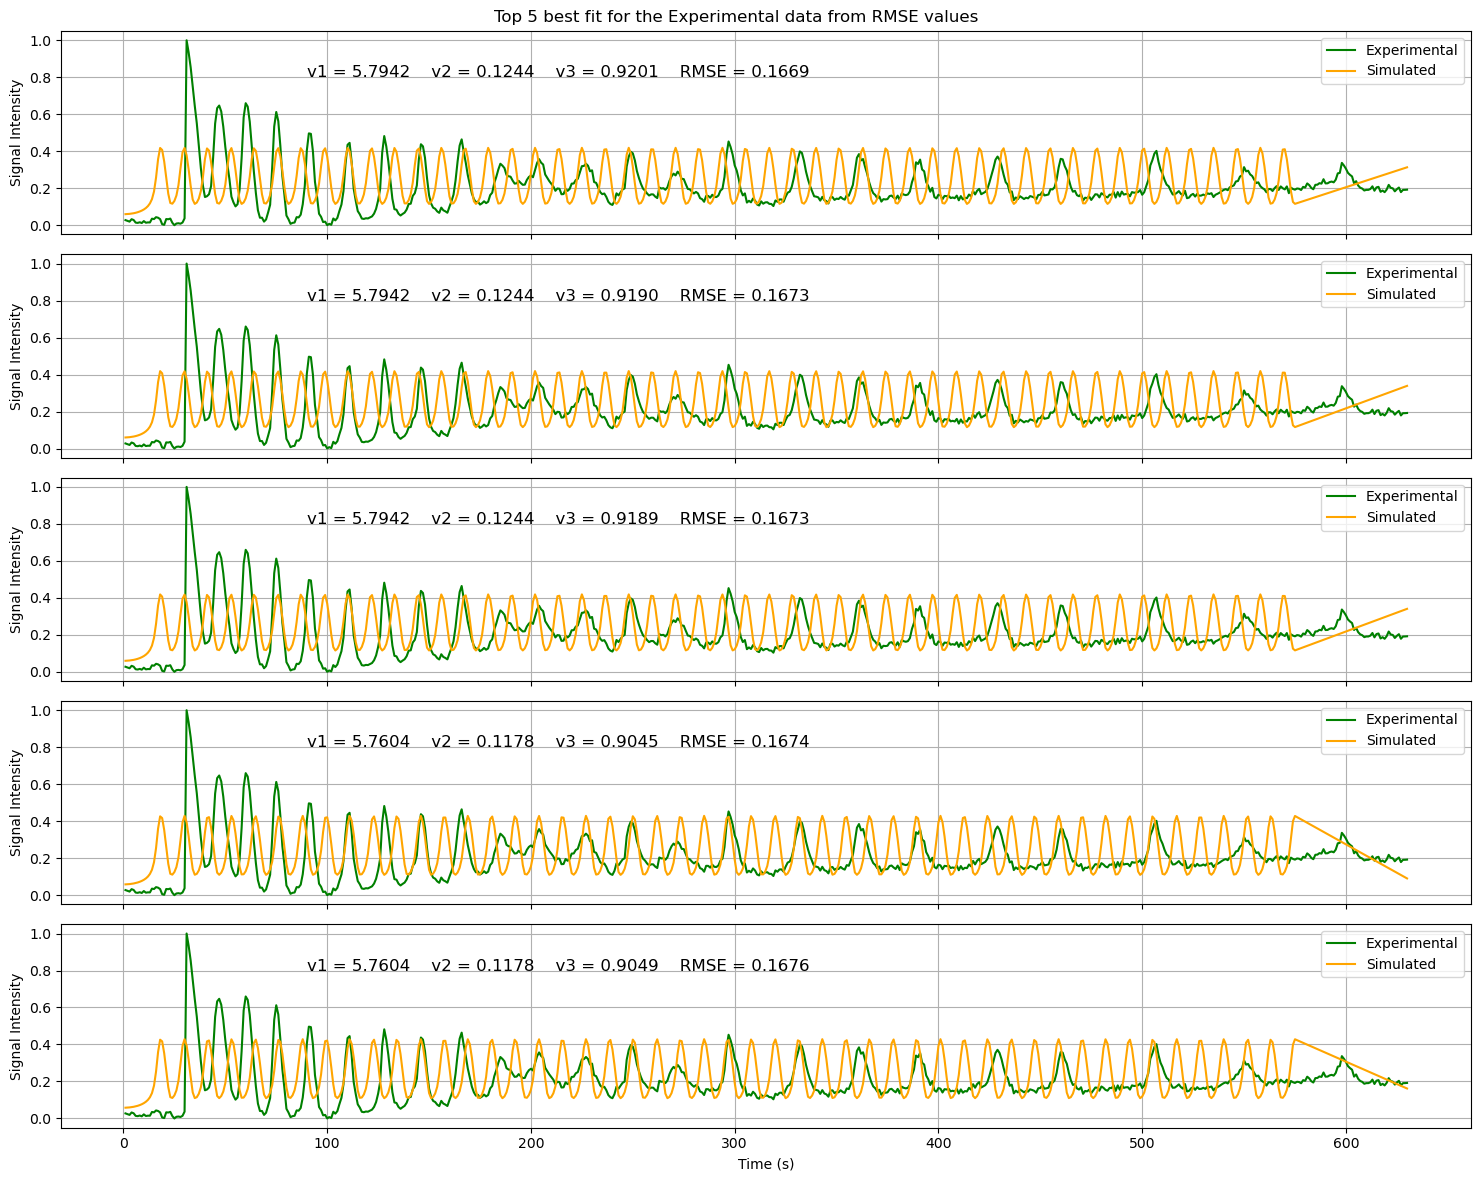

In [79]:
fig, axes = plt.subplots(5,1, figsize=(15,12), sharex=True)
plt.suptitle("Top 5 best fit for the Experimental data from RMSE values")

for i in range(5):
    ax = axes[i]
    ax.plot(time, normalized_data, 'g', alpha=1, linewidth=1.5, label="Experimental")
    ax.plot(time, Ca_final[top_5_smallest_indices[i]], c="orange", alpha=1, linewidth=1.5, label="Simulated")
    ax.set_ylabel("Signal Intensity")
    ax.text(90, 0.8,"v1 = {:.4f}    v2 = {:.4f}    v3 = {:.4f}    RMSE = {:.4f}".format(v[top_5_smallest_indices].T[0][i],
            v[top_5_smallest_indices].T[1][i], v[top_5_smallest_indices].T[2][i], rmse_values[top_5_smallest_indices][i]), fontsize=12)
    ax.grid()
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

# **Frequency Comparison**

In [68]:
def frequency(data):
    autocorr = np.correlate(data, data, mode='full')
    autocorr = autocorr[autocorr.size // 2:] 

    peaks = np.where((autocorr[1:-1] > autocorr[:-2]) & (autocorr[1:-1] > autocorr[2:]))[0]
    if len(peaks) > 0:
        period = peaks[0] + 1 
        freq = 1 / period

    return freq

In [69]:
exp_data_freq = frequency(normalized_data)
print(f"The rough frequency of experimental data is {exp_data_freq}")

The rough frequency of experimental data is 0.06666666666666667


In [70]:
simulated_freq = []

for i in range(len(Ca_final)):
    freq = frequency(Ca_final[i])
    simulated_freq.append(freq)

simulated_freq = np.array(simulated_freq)

In [71]:
frequency_differce = np.abs(simulated_freq - exp_data_freq)
frequency_differce.shape

(27000,)

## **Top 5 Best Fit from Frequency Difference**

In [75]:
sorted_index = np.argsort(frequency_differce)
top_5_smallest_index = sorted_index[:5]

freq_df = pd.DataFrame({"v1": v[top_5_smallest_index].T[0],
                        "v2": v[top_5_smallest_index].T[1],
                        "v3": v[top_5_smallest_index].T[2],
                        "Frequency Difference": frequency_differce[top_5_smallest_index]})
freq_df

,v1,v2,v3,Frequency Difference
0,5.794170,0.077345,0.877155,0.010256
1,5.794170,0.079673,0.906825,0.010256
2,5.794170,0.079673,0.890044,0.010256
3,5.794170,0.079673,0.890153,0.010256
4,6.006569,0.077345,0.920142,0.010256


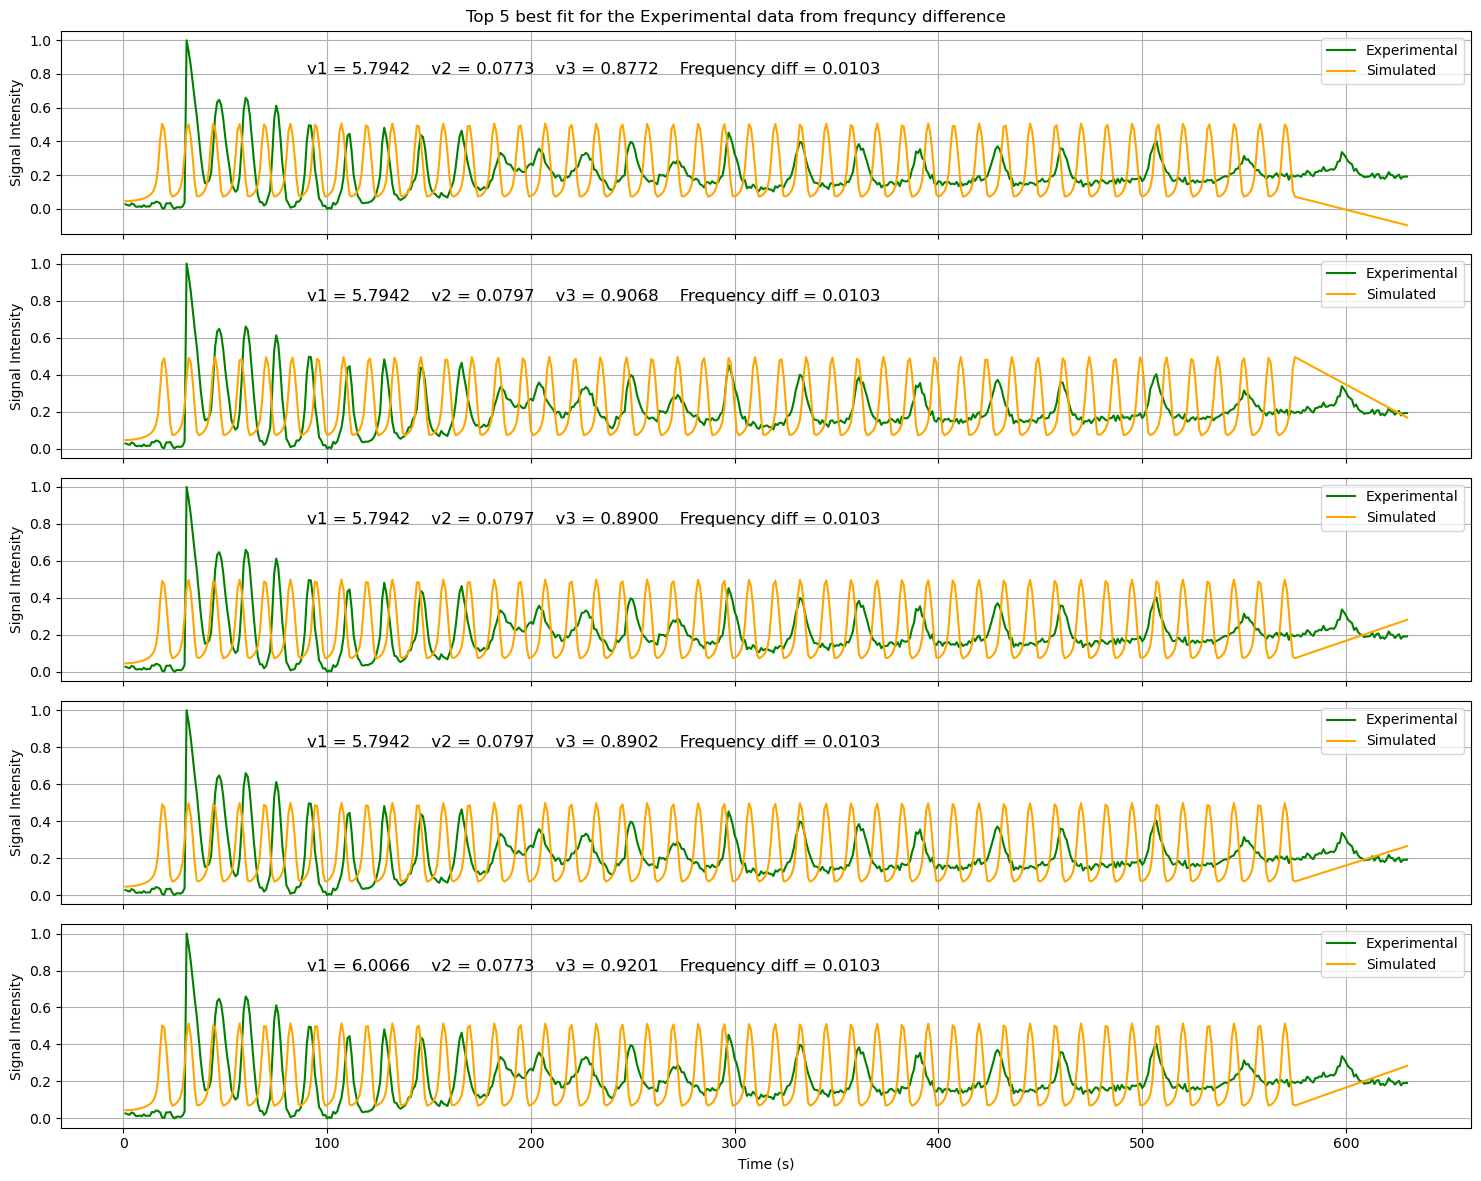

In [77]:
fig, axes = plt.subplots(5,1, figsize=(15,12), sharex=True)
plt.suptitle("Top 5 best fit for the Experimental data from frequncy difference")

for i in range(5):
    ax = axes[i]
    ax.plot(time, normalized_data, 'g', alpha=1, linewidth=1.5, label="Experimental")
    ax.plot(time, Ca_final[top_5_smallest_index[i]], c="orange", alpha=1, linewidth=1.5, label="Simulated")
    ax.set_ylabel("Signal Intensity")
    ax.text(90, 0.8,"v1 = {:.4f}    v2 = {:.4f}    v3 = {:.4f}    Frequency diff = {:.4f}".format(v[top_5_smallest_index].T[0][i],
            v[top_5_smallest_index].T[1][i], v[top_5_smallest_index].T[2][i], frequency_differce[top_5_smallest_index][i]), fontsize=12)
    ax.grid()
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()